In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r'C:\Users\Hp\Downloads\House_d.csv')

In [3]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
data.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
data1=data.drop(['area_type','availability','balcony','society'],axis=1)

In [6]:
data1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
data1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
data2=data1.dropna(axis=0)

In [9]:
data2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
data2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
data2['BHK']=data2['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\Hp\AppData\Local\Temp\ipykernel_1768\1788951584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['BHK']=data2['size'].apply(lambda x: int(x.split(' ')[0]))


In [12]:
data2.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
data2[data2['BHK']>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [14]:
data2.bath.unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [15]:
data2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def is_float(x):
    try:
        float(x)
    except:
       return False 
    return True

In [17]:
data2[~data2['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [18]:
def conversion_sq_num(x):
    token = x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [19]:
conversion_sq_num('2100 - 2850')

2475.0

In [20]:
data3=data2.copy()

In [21]:
data3['total_sqft']=data3['total_sqft'].apply(conversion_sq_num)

In [22]:
data3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [23]:
data4=data3.copy()

In [24]:
data4['price_per_sqft']=data4['price']*100000/data4['total_sqft']

In [25]:
data4['price_per_sqft']=data4['price_per_sqft'].round(2)

In [26]:
data4.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00


In [27]:
len(data4.location.unique())

1304

In [28]:
##this len is too much for one hot encoding , so will decrease it by removing 

In [29]:
data4['location']=data4['location'].apply(lambda x: x.strip())

In [30]:
location_stats=data4.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [31]:
location_stats

location
Whitefield                            535
Sarjapur  Road                        392
Electronic City                       304
Kanakpura Road                        266
Thanisandra                           236
                                     ... 
poornaprajna layout                     1
pavitra paradise                        1
near Ramanashree California resort      1
mvj engineering college                 1
1Kasavanhalli                           1
Name: location, Length: 1293, dtype: int64

In [32]:
len(location_stats[location_stats<=10])

1052

In [33]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Kalkere                               10
Sadashiva Nagar                       10
BTM 1st Stage                         10
Basapura                              10
Gunjur Palya                          10
                                      ..
poornaprajna layout                    1
pavitra paradise                       1
near Ramanashree California resort     1
mvj engineering college                1
1Kasavanhalli                          1
Name: location, Length: 1052, dtype: int64

In [34]:
len(data4.location.unique())

1293

In [35]:
data4['location']=data4['location'].apply(lambda x:'other' if x in location_stats_less_than_10 else x)

In [36]:
len(data4.location.unique())

242

In [37]:
data4.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.86
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.06
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.82
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.24
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.51


In [38]:
data4[data4['total_sqft']/data4['BHK']<300]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.51
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.33
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.98
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.30
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.00
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.43
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.33
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.91
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.93


In [39]:
data4.shape

(13246, 7)

In [40]:
data5=data4[~(data4['total_sqft']/data4['BHK']<300)]
data5.shape

(12502, 7)

In [41]:
def remove_pps_outliers (df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st= np.std(subdf.price_per_sqft)
        reduced_df=subdf [(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df7=remove_pps_outliers (data5)
df7.shape

(10241, 7)

In [42]:
df7[df7['bath']>df7['BHK']+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.03
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.57
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.03
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.90


In [43]:
df8=df7[df7['bath']<df7['BHK']+2]
df8

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.54
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.84
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.33
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.33
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.81
...,...,...,...,...,...,...,...
10236,other,2 BHK,1353.0,2.0,110.00,2,8130.08
10237,other,1 Bedroom,812.0,1.0,26.00,1,3201.97
10238,other,3 BHK,1440.0,2.0,63.93,3,4439.58
10239,other,2 BHK,1075.0,2.0,48.00,2,4465.12


In [44]:
df8.shape

(10147, 7)

In [45]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats [bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft), 
                'std': np.std(bhk_df.price_per_sqft), 
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats ['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

df9= remove_bhk_outliers(df8)
df9.shape

(7254, 7)

In [46]:
df9.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,7254.000000,7254.000000,7254.000000,7254.000000,7254.000000
mean,1470.687978,2.413565,96.518040,2.484009,6098.318750
std,815.257426,0.938867,87.669174,0.909048,2380.446181
min,300.000000,1.000000,10.000000,1.000000,1300.000000
25%,1092.000000,2.000000,50.000000,2.000000,4590.160000
50%,1255.000000,2.000000,72.000000,2.000000,5665.590000
75%,1654.000000,3.000000,110.000000,3.000000,6861.495000
max,30000.000000,16.000000,2200.000000,16.000000,24509.800000


In [47]:
df9.shape

(7254, 7)

In [48]:
data_cleaned=df9.reset_index(drop=True)

In [49]:
data_cleaned.describe(include='all')

,location,size,total_sqft,bath,price,BHK,price_per_sqft
count,7254,7254,7254.000000,7254.000000,7254.000000,7254.000000,7254.000000
unique,242,23,NaN,NaN,NaN,NaN,NaN
top,other,2 BHK,NaN,NaN,NaN,NaN,NaN
freq,1136,3440,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1470.687978,2.413565,96.518040,2.484009,6098.318750
std,NaN,NaN,815.257426,0.938867,87.669174,0.909048,2380.446181
min,NaN,NaN,300.000000,1.000000,10.000000,1.000000,1300.000000
25%,NaN,NaN,1092.000000,2.000000,50.000000,2.000000,4590.160000
50%,NaN,NaN,1255.000000,2.000000,72.000000,2.000000,5665.590000
75%,NaN,NaN,1654.000000,3.000000,110.000000,3.000000,6861.495000


In [50]:
data_cleaned.shape

(7254, 7)

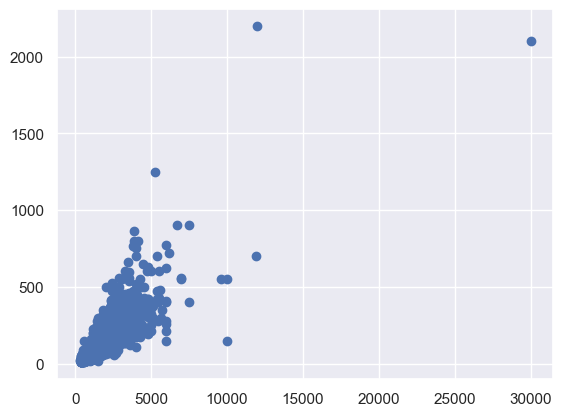

In [51]:
plt.scatter(data_cleaned['total_sqft'],data_cleaned['price'])
plt.show()

In [52]:
data_cleaned.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,7254.000000,7254.000000,7254.000000,7254.000000,7254.000000
mean,1470.687978,2.413565,96.518040,2.484009,6098.318750
std,815.257426,0.938867,87.669174,0.909048,2380.446181
min,300.000000,1.000000,10.000000,1.000000,1300.000000
25%,1092.000000,2.000000,50.000000,2.000000,4590.160000
50%,1255.000000,2.000000,72.000000,2.000000,5665.590000
75%,1654.000000,3.000000,110.000000,3.000000,6861.495000
max,30000.000000,16.000000,2200.000000,16.000000,24509.800000


In [53]:
data_half=data_cleaned.drop(['size','price_per_sqft'],axis=1)

In [54]:
data_half.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [55]:
dummies=pd.get_dummies(data_half['location'],dtype=int)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df11=pd.concat([data_half,dummies.drop('other',axis=1)],axis=1)
df11.head(3)

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df12=df11.drop(['location'],axis=1)

In [58]:
df12.head(3)

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
y=df12['price']
x=df12.drop(['price'],axis=1)

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [61]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [62]:
reg.fit(x_train,y_train)

LinearRegression()

In [63]:
reg.score(x_train,y_train)

0.8566791846211006

In [64]:
reg.score(x_test,y_test)

0.8296410891793297

In [65]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.82627616, 0.78753004, 0.8502434 , 0.86944424, 0.86392791])

In [66]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(x.columns==location)[0][0]

    X=np.zeros(len(x.columns))
    X[0]=sqft
    X[1]=bath
    X[2]=bhk
    if loc_index>=0:
        X[loc_index]=1

    return reg.predict([X])[0]

In [67]:
x.columns

Index(['total_sqft', 'bath', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [68]:
predict_price( '1st Phase JP Nagar',1500,2,2).round(2)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(123.49)

In [69]:
predict_price( '1st Phase JP Nagar',1500,3,3).round(2)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(126.84)

In [70]:
import pickle
with open('ML_model.pickle','wb') as f:
    pickle.dump(reg,f)

In [72]:
import json
columns={
    'data_columns': [i.lower() for i in x.columns]
}
with open('columns.json','w')as f:
    f.write(json.dumps(columns))